# Charlotte_Leysen Assignment 4

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid", rc={'figure.figsize':(6,6)})
sns.set_palette("Set2", 10)

#### Load and analyse the data

In [2]:
f_path = '/Users/charlotteleysen/Google Drive/*PROJECTS/IE/Term 2/Python/Assignments/Visualation Census Data/data/'
df = pd.read_csv(f_path + 'adult.data.txt', header = None)

df.describe()

,0,2,4,10,11,12
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
0     32561 non-null int64
1     32561 non-null object
2     32561 non-null int64
3     32561 non-null object
4     32561 non-null int64
5     32561 non-null object
6     32561 non-null object
7     32561 non-null object
8     32561 non-null object
9     32561 non-null object
10    32561 non-null int64
11    32561 non-null int64
12    32561 non-null int64
13    32561 non-null object
14    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There are 6 numeric variables and 9 object variables.

### Question 1

Produce a pandas DataFrame with proper column names, an appropriate index and correct handling of missing data (e.g. use of None or NaN where appropriate)

#### Add proper column names

In [4]:
col_names = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education_num',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital_gain',
    'capital_loss',
    'hours_per_week',
    'native_country',
    'income']

df.columns = col_names
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Check the null values

In [5]:
df.apply(lambda x: sum(x.isnull()))

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

There appear to be no null values. But let's have a closer look at the data.

In [6]:
object_cols = list(df.select_dtypes(['object']).columns)
factor_levels = df[object_cols].apply(lambda x: list(x.unique()))

In [7]:
for value in factor_levels:
    print(value)

[' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked']
[' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th', ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th']
[' Never-married', ' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Separated', ' Married-AF-spouse', ' Widowed']
[' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair', ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct', ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces', ' Priv-house-serv']
[' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried', ' Other-relative']
[' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other']
[' Male', ' Female']
[' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico', ' South', ' Puerto

There appears to be '?' in the object / category variables, which we will need to clean. Also each string is preceded by white space, which we will remove.

#### Remove white space


In [8]:
df[object_cols] = df[object_cols].apply(lambda x: x.str.strip())

#### Change all '?' to None values

In [9]:
for i in object_cols:
    df.loc[df.loc[:, i] == '?', i] = None

#### Check the changes

In [10]:
factor_levels = df[object_cols].apply(lambda x: list(x.unique()))
print(factor_levels[0])

['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', None, 'Self-emp-inc', 'Without-pay', 'Never-worked']


In [11]:
df.apply(lambda x: sum(x.isnull()))

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

Now all the '?' and white space has been cleared we can prepare the data for visualsation by changing the 'object' data types to 'category'.

In [12]:
df[object_cols] = df[object_cols].apply(lambda x: x.astype('category'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null category
fnlwgt            32561 non-null int64
education         32561 non-null category
education_num     32561 non-null int64
marital_status    32561 non-null category
occupation        30718 non-null category
relationship      32561 non-null category
race              32561 non-null category
sex               32561 non-null category
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    31978 non-null category
income            32561 non-null category
dtypes: category(9), int64(6)
memory usage: 1.8 MB


### Question 2

Visualize the correlation of the numerical variables.

In [31]:
numeric_cols = list(df.select_dtypes(
    ['float']).columns) + list(df.select_dtypes(['int']).columns)
corr = df[numeric_cols].corr()

#### Create a correlation plot

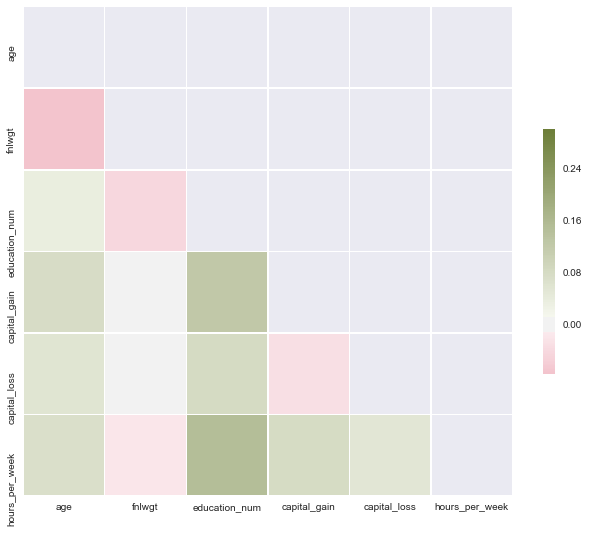

In [14]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(5, 100, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5});

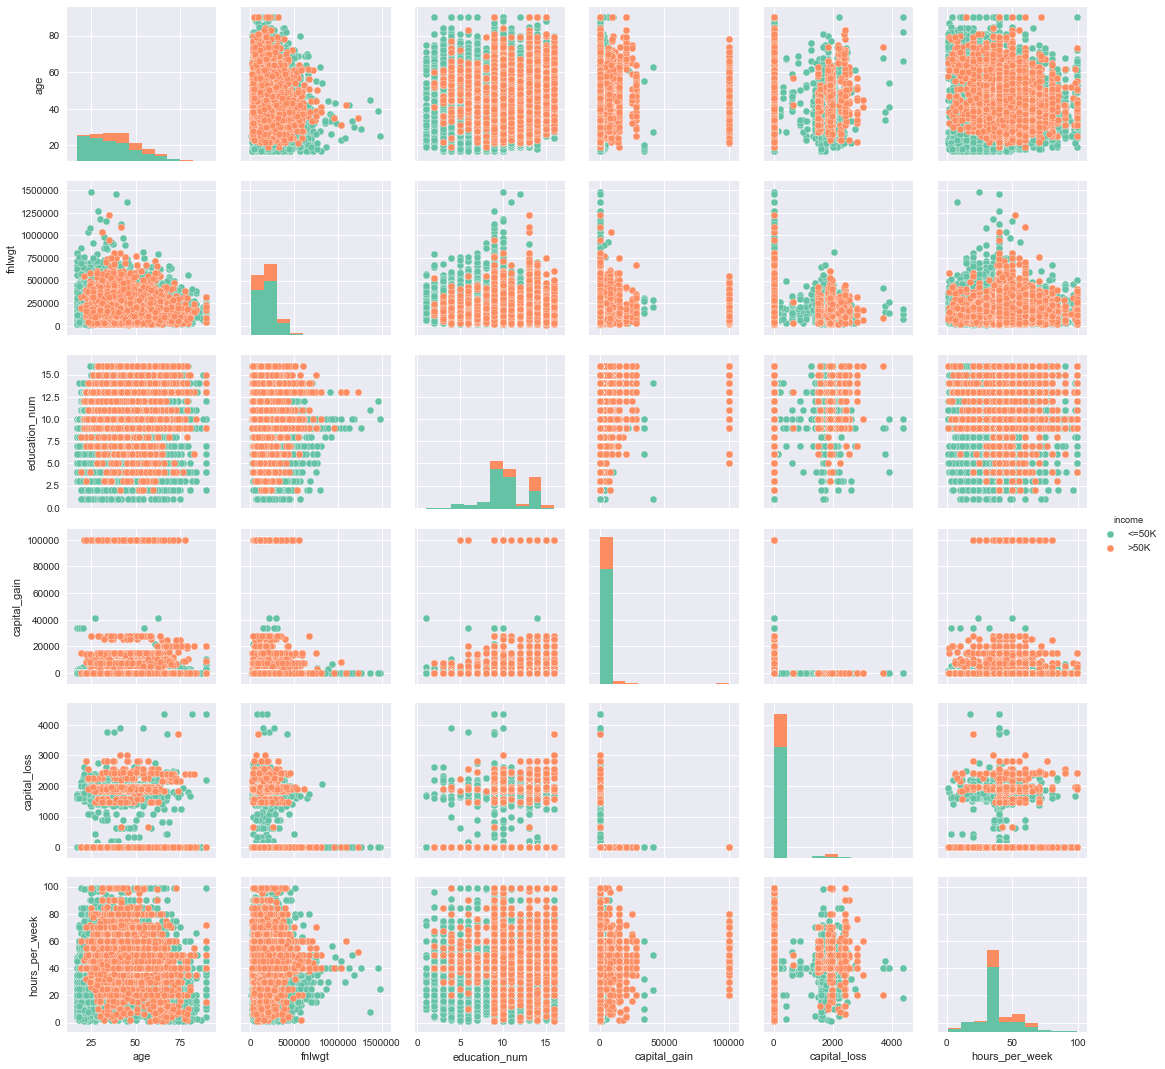

In [17]:
sns.pairplot(df, hue = 'income', size=2.5);

### Question 3

Visualize the relationships between Age, Work Hours and earning <= or > 50k, displaying the effect of Sex, Race and Education as well.

#### Initial histgram and bar plots

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


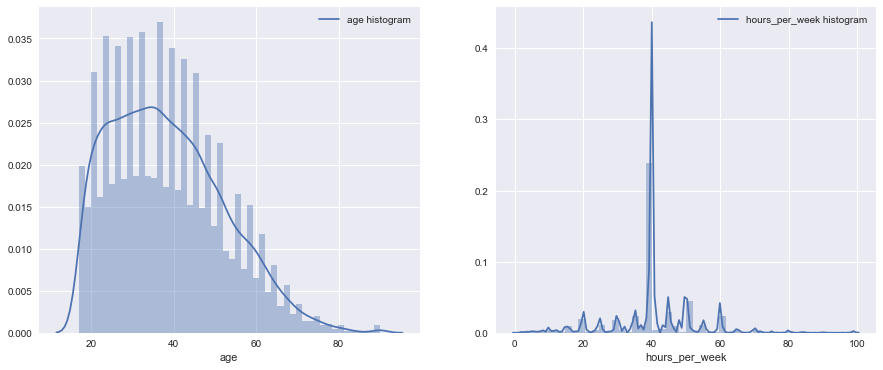

In [15]:
sns.set(rc={'figure.figsize':(15,6)})
fig, ax = plt.subplots(1,2)
sns.distplot(df.age, kde_kws={'label':'age histogram'},  ax=ax[0]);
sns.distplot(df.hours_per_week, kde_kws={'label':'hours_per_week histogram'},  ax=ax[1]);

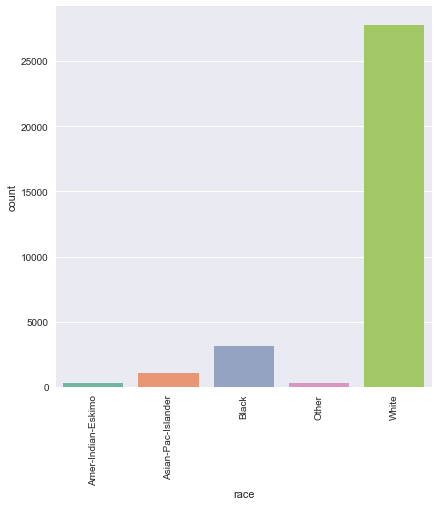

In [19]:
a = sns.factorplot(x = 'race', data = df, kind = 'count', size = 6);
a.set_xticklabels(rotation = 90)

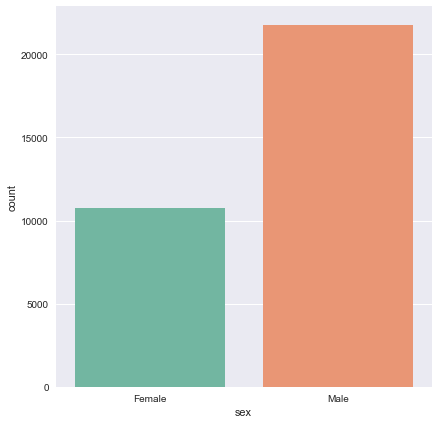

In [18]:
sns.factorplot(x = 'sex', data = df, kind = 'count', size = 6);

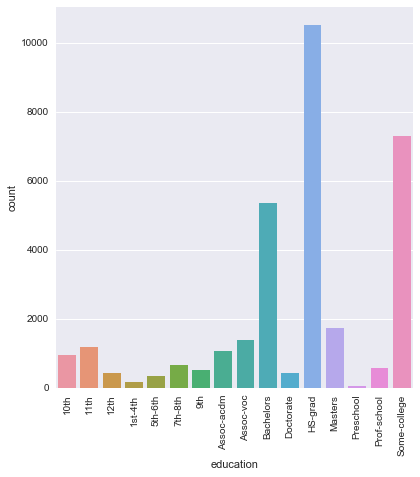

In [24]:
education_plot = sns.factorplot(x = 'education', data = df, kind = 'count', size = 6)
education_plot.set_xticklabels(rotation = 90);

#### Plot scatter plots of the data with Seaborn

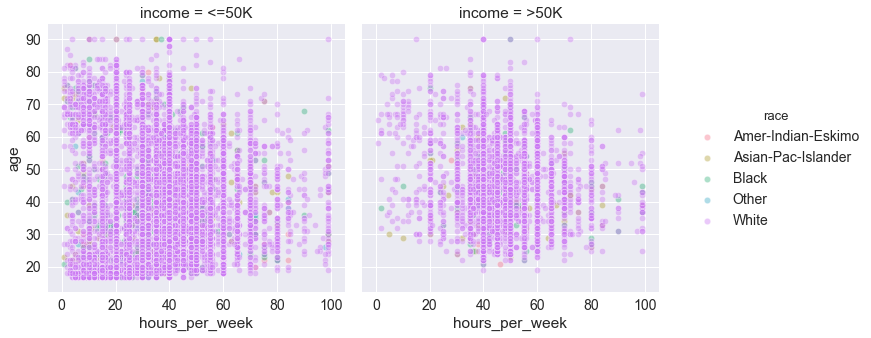

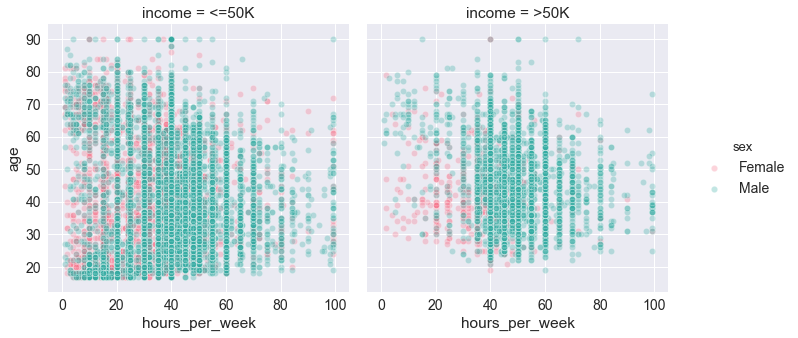

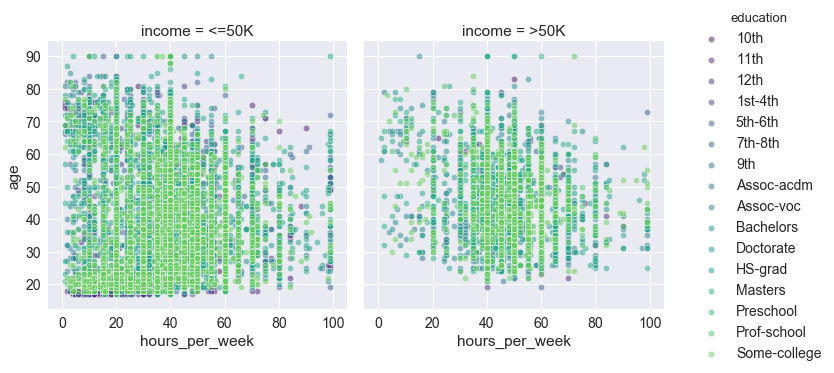

In [19]:
sns.set(font_scale=1.4)

sns.set_palette("viridis", 4)
a = sns.FacetGrid(df, col="income", hue="race", size=5, margin_titles=True)
a.map(
    sns.regplot,
    "hours_per_week",
    "age",
    scatter_kws={
        's': 40,
        'alpha': 0.4,
        'edgecolor': "white",
        'lw': .7},
    data=df,
    fit_reg=False);
a.add_legend();

sns.set_palette("viridis", 1)
b = sns.FacetGrid(df, col="income", hue="sex", size=5, margin_titles=True)
b.map(
    sns.regplot,
    "hours_per_week",
    "age",
    scatter_kws={
        's': 40,
        'alpha': 0.3,
        'edgecolor': "white",
        'lw': .7,
    },
    data=df,
    fit_reg=False);
b.add_legend();

sns.set_palette("viridis", 20)
c = sns.FacetGrid(
    df,
    col="income",
    hue="education",
    size=5,
    margin_titles=True)
c.map(
    sns.regplot,
    "hours_per_week",
    "age",
    scatter_kws={
        's': 40,
        'alpha': 0.5,
        'edgecolor': "white",
        'lw': .7,
    },
    data=df,
    fit_reg=False,
    label='big');
c.add_legend();


### Question 3 Extra

#### Plot scatter plots of the data with Bokeh

Attempt to create similar plots as above in a tabbed format.

#### Import Bokeh libraries

In [1]:
from bokeh.plotting import figure, show, output_file
from bokeh.models.widgets import Panel
from bokeh.models.widgets import Tabs
from bokeh.models import CategoricalColorMapper, ColumnDataSource

#### Load necessary objects

In [2]:
tools = "hover,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,reset,box_select,lasso_select"
source = ColumnDataSource(
    df.loc[:, ['hours_per_week', 'age', 'sex', 'race', 'education']])


NameError: name 'df' is not defined

#### Create first graph - hrs vs age with sex

In [22]:
color_mapper_sex = CategoricalColorMapper(factors=['Female', 'Male'],
                                       palette=['red', 'blue'])
p_sex = figure(tools=tools)
p_sex.scatter(
    'hours_per_week',
    'age',
    source=source,
    color=dict(
        field='sex',
        transform=color_mapper_sex),
    fill_alpha=0.6,
    legend='sex');

#### Create second graph - hrs vs age with race

In [23]:
color_mapper_race = CategoricalColorMapper(
    factors=[
        'White',
        'Black',
        'Asian-Pac-Islander',
        'Amer-Indian-Eskimo',
        'Other'],
    palette=[
        'white',
        'black',
        'red',
        'yellow',
        'green'])

p_race = figure(tools = tools)
p_race.scatter(
    'hours_per_week',
    'age',
    source=source,
    color=dict(
        field='race',
        transform=color_mapper_race),
    fill_alpha=0.6,
    line_color='white',
    legend='race');

In [24]:
#### Create third graph - hrs vs age with education

In [25]:
color_mapper_education = CategoricalColorMapper(
    factors=[
        'Bachelors',
        'HS-grad',
        '11th',
        'Masters',
        '9th',
        'Some-college',
        'Assoc-acdm',
        'Assoc-voc',
        '7th-8th',
        'Doctorate',
        'Prof-school',
        '5th-6th',
        '10th',
        '1st-4th',
        'Preschool',
        '12th'],
    palette=[
        'firebrick',
        'sienna',
        'gold',
        'green',
        'mediumspringgreen',
        'deepskyblue',
        'royalblue',
        'plum',
        'tan',
        'slategray',
        'moccasin',
        'silver',
        'navy',
        'darkcyan',
        'mediumpurple',
        'black'])

p_education = figure(tools=tools)
p_education.scatter(
    'hours_per_week',
    'age',
    source=source,
    color=dict(
        field='education',
        transform=color_mapper_education),
    fill_alpha=0.6,
    line_color='white',
    legend='education');

Create tabbed panels to show the graphs

In [26]:
tab1 = Panel(child=p_sex, title='hrs vs age with sex')
tab2 = Panel(child=p_race, title='hrs vs age with race')
tab3 = Panel(child=p_education, title='hrs vs age with education')

layout = Tabs(tabs=[tab1, tab2, tab3])
show(layout)

The layout may take some time to load